In [ ]:
#подключение гугл диска
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#ПОТОКОВЫЙ ВВОД И ВВЫВОД

**ПОТОКОВЫЙ ВВОД** \
Функция input() хорошо подходит для ввода данных, когда мы знаем, сколько строк с данными предстоит ввести, либо знаем, какая строка будет сигналом для остановки ввода данных. Если количество входных строк мы не знаем, а строки для остановки ввода не предусмотрено, следует использовать так называемый стандартный поток ввода.

**Поток ввода (sys.stdin)** — это специальный объект в программе, куда попадает весь текст, который ввёл пользователь. Потоком его называют потому, что данные хранятся в нем до тех пор, пока программа их не прочитала.

Поток ввода (sys.stdin)  является итератором, который невозможно перезапустить. Как и любой итератор, он может двигаться только вперёд. Как только данные прочитаны, они удаляются из потока ввода безвозвратно. Элементы, которые выдает этот итератор — это строки, введённые пользователем. Если пользовательский ввод закончен, то итератор прекращает работу.

Чтобы работать с потоком ввода (sys.stdin), необходимо подключить модуль sys стандартной командой

**import sys**


**sys.stdin.read()**- возвращает строку, хранящую  в себе весь пользовательский ввод ( с сохранением \n и тд)

**sys.stdin.readlines()** - вовращает список строк, введенных пользователем  ( с сохранением \n и тд)

In [ ]:
#Пример 1: программа, которая дублирует каждую введённую пользователем строку
#Пока есть данные в потоке ввода sys.stdin(то есть пока пользователь их вводит) программа будет записывать вводимые строки в переменную line, убирать символы перевода строки и выводить их на печать.
#Для завершения ввода необходимо ввести Ctrl + D
import sys

for line in sys.stdin:
    print(line.strip('\n'))


In [ ]:
#Пример 2: считывание всего пользовательского ввода в список
import sys
data = [line.strip() for line in sys.stdin]

**ПОТОКОВЫЙ ВЫВОД**

По умолчанию функция print() перенаправляет вывод данных  в **sys.stdout**, можно направлять данные в sys.stdout самостоятельно

In [ ]:
import sys
sys.stdout.write('Hello ')
sys.stdout.write('word! ')
sys.stdout.write('from python\n')
print('Bye-bye')
sys.stdout.write(str(17))

#Метод write не переводит на новую строку как print, нужно добавлять \n самостоятельно.
#Также  нам нужно самостоятельно преобразовывать данные к строковому типу данных (функция print() это делает автоматически).

Hello word! from python
Bye-bye
17

# ФАЙЛОВЫЙ ВВОД И ВЫВОД

Этапы работы с файлом:

1.   Открытие файла
2.   Чтение/запись данных
3.   Закрытие файла







**ОТКРЫТИЕ ФАЙЛА И ЗАКРЫТИЕ ФАЙЛА** \

Для открытия файлов в Python существует функция **open()**. Она создает файловый объект и связывает его с файлом на диске. Общий формат применения функции open():

**файловая_переменная = open(имя_файла, режим_доступа)**

* *файловая переменная* – дескриптор файла, т.е имя переменной, которая ссылается на файловый объект;
* *имя_файла* – строковый литерал, задающий имя файла + путь к файлу;
* *режим_доступа* – строковый литерал, задающий режим доступа (чтение, запись, и т.д.), в котором файл будет открыт.


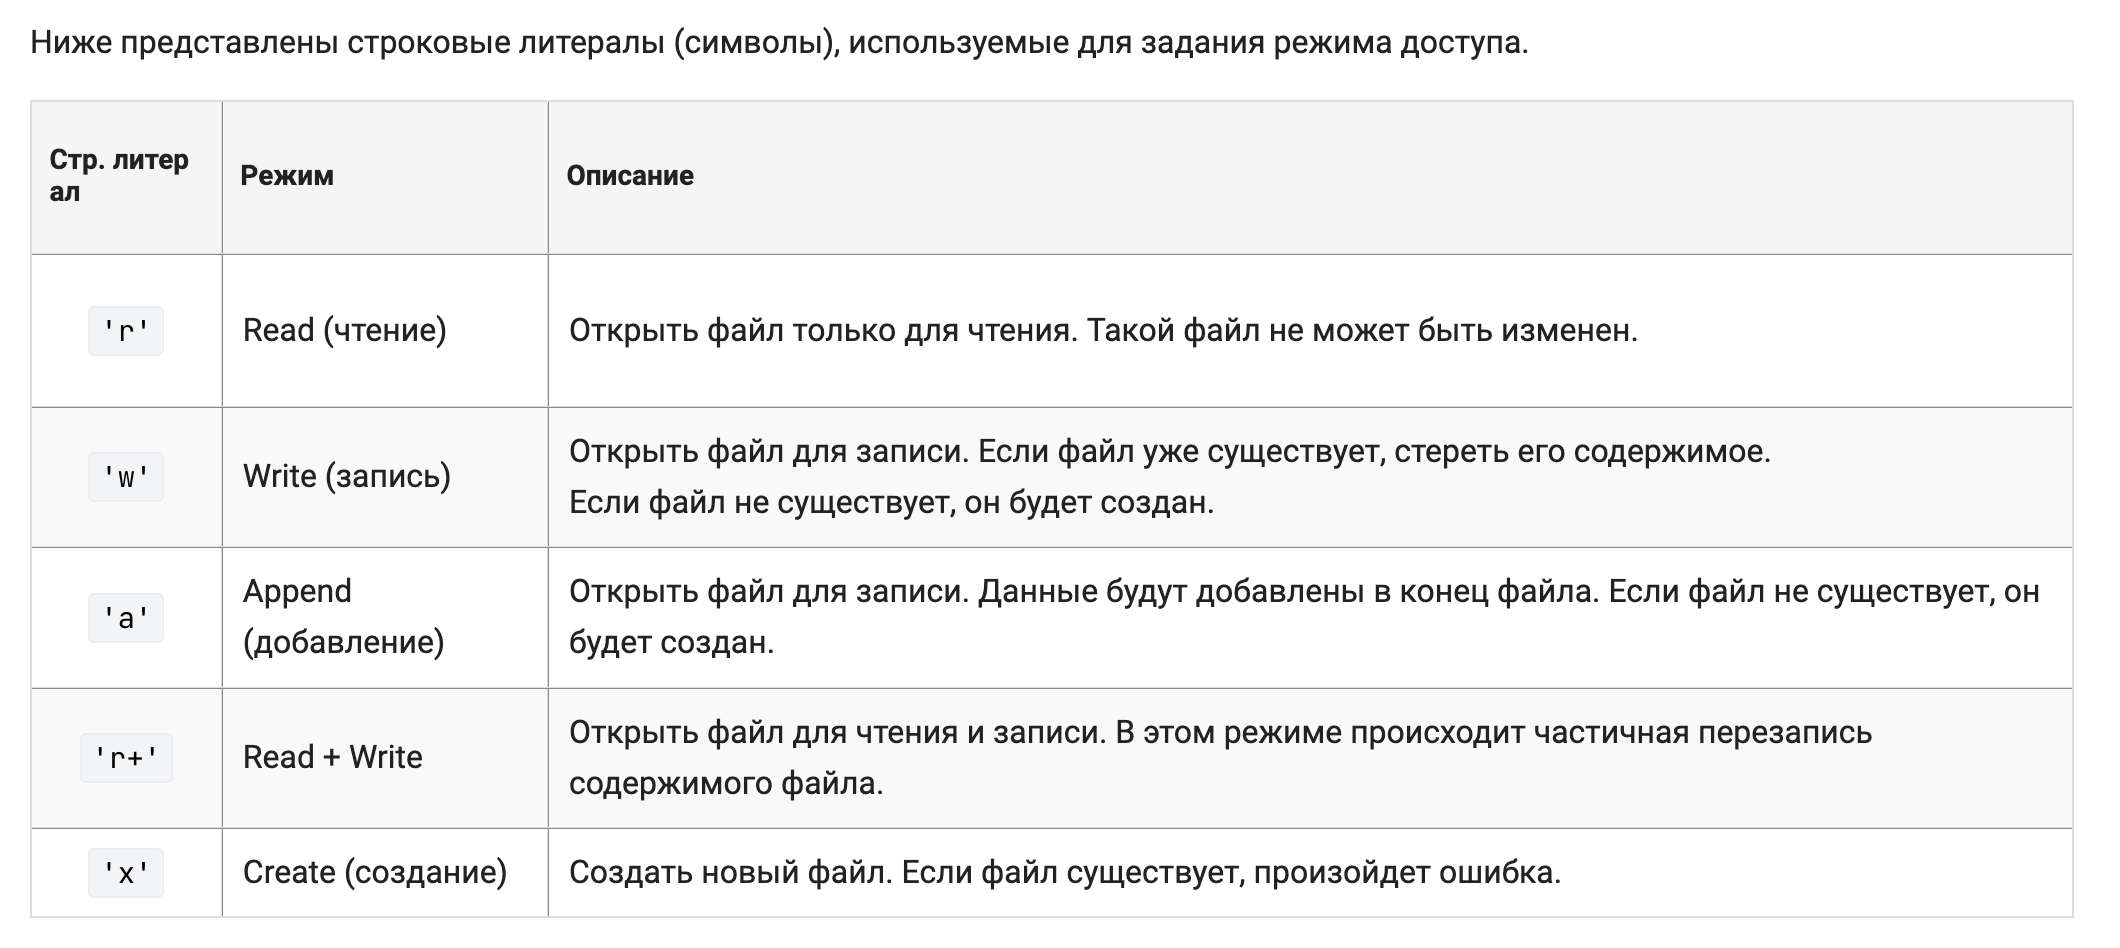

После окончания работы с файлом его необходимо закрыть.

**файловая_переменная.close()**

In [ ]:
student_file = open('students.txt', 'w')
my_file = open('text.txt')   # по умолчанию режим доступа для чтения ('rt’)-чтение текстового файла

student_file.close()
my_file.close()

In [ ]:
inp = open('input_file.txt')
out = open('output_file.txt', 'w')
content = inp.read()
out.write(content)
inp.close()
out.close()

In [ ]:
#При работе с текстом на русском языке нужно указать кодировку, для этого служит параметр encoding:
file = open('info.txt', 'r', encoding='utf-8')
file.close()

Если название файла передается без указания пути, интерпретатор Python исходит из предположения, что место расположения файла то же, что у исполняемой программы. Если файл лежит в другом месте, нужно указать полный путь до него

In [ ]:
f = open('/Users/katechikareva/Desktop/text.txt', 'w')
f.close()

**МЕНЕДЖЕР КОНКЕКСТА** \


Закрытие файлов вручную методом close(), а также отдача закрытия на откуп среде исполнения, обладают существенным недостатком: если между открытием файла и его закрытием произойдёт ошибка, в лучшем случае файл окажется открыт слишком долго, а в худшем случае часть данных не сохранится.

Поэтому предпочтительный вариант использовать менеджер контекста:

In [ ]:
with open('languages.txt', 'r') as file:
    for line in file:
        print(line)
                          # автоматическое закрытие файла
print('Файл закрыт')

In [ ]:
#С помощью менеджера контекста можно работать с несколькими файлами.
with open('input.txt', 'r') as input_file, open('output.txt', 'w') as output_file:
    # обработка файлов

**ЧТЕНИЕ СОДЕРЖИМОГО ФАЙЛА**

Для чтения содержимого открытого для чтения файла используются три файловых метода:
* **read(n)** – читает все содержимое файла;  считывает все содержимое файла, включая переносы строк; n - необязательный параметр, количество символов, которые будут считаны
* **readline()** – метод считывает одну строку из файла (до символа конца строки), при этом возвращается считанная строка вместе с символом '\n'. Если считать строку не удалось – достигнут конец файла и больше строк в нем нет, возвращается пустая строка.
* **readlines()** – читает все содержимое файла и возвращает список строк, при этом, каждая строка в списке заканчивается символом переноса строки  '\n'




Способы прочтения содержимого по одной строке:

In [ ]:
#READ
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
  print(file.read())

In [ ]:
#READLINE, 1 способ: цикл while
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
    line = file.readline()         # считываем первую строку
    while line != '':              # пока не конец файла
        print(line.strip())        # обрабатываем считанную строку
        line = file.readline()     # читаем новую строку


In [ ]:
#READLINE, 2 способ: цикл for, предпочтительнее
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
  for line in file:
    print(line.strip())

In [ ]:
#READLINES формируется список строк
with open('/content/gdrive/MyDrive/Colab Notebooks/pushkin.txt') as file:
    lines = [line.strip() for line in file.readlines()]
    print(*lines, sep = '\n')

Я вас любил: любовь еще, быть может,
В душе моей угасла не совсем;
Но пусть она вас больше не тревожит;
Я не хочу печалить вас ничем.
Я вас любил безмолвно, безнадежно,
То робостью, то ревностью томим;
Я вас любил так искренно, так нежно,
Как дай вам Бог любимой быть другим.



**ЗАПИСЬ В ФАЙЛ** \

Для записи используются два файловых метода:

*  **file.write(string)** - метод записывает в файловую переменную file строку string

*  **file.writelines(rows)** - метод записывает в файловую переменную file список строк rows

Оба метода write() и writelines() не добавляют переход на новую строку, поэтому для перехода на новую строку в файле необходимо явно добавить символ '\n'.

In [ ]:
with open('myfile.txt', 'w', encoding='utf-8') as file:
    file.write('Hello world!\n')
    file.write('Using python\n')


In [ ]:
philosophers = ['Джoн Локк\n', 'Дэвид Хьюм\n', 'Эдмyнд Берк\n']
with open('philosophers.txt', 'w', encoding='utf-8') as file:
    file.writelines(philosophers)

Для форматирования выводимого текста можно использовать функцию **print()**

In [ ]:
with open('philosophers.txt', 'w', encoding='utf-8') as output:
    print('Джoн Локк', file=output)
    print('Дэвид Хьюм', file=output)
    print('Эдмyнд Берк', file=output)
    print('Джoн Локк', 'Дэвид Хьюм', 'Эдмyнд Берк', sep='***', file=output)

# РАБОТА С CSV ФАЙЛАМИ

**CSV** (от англ. Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

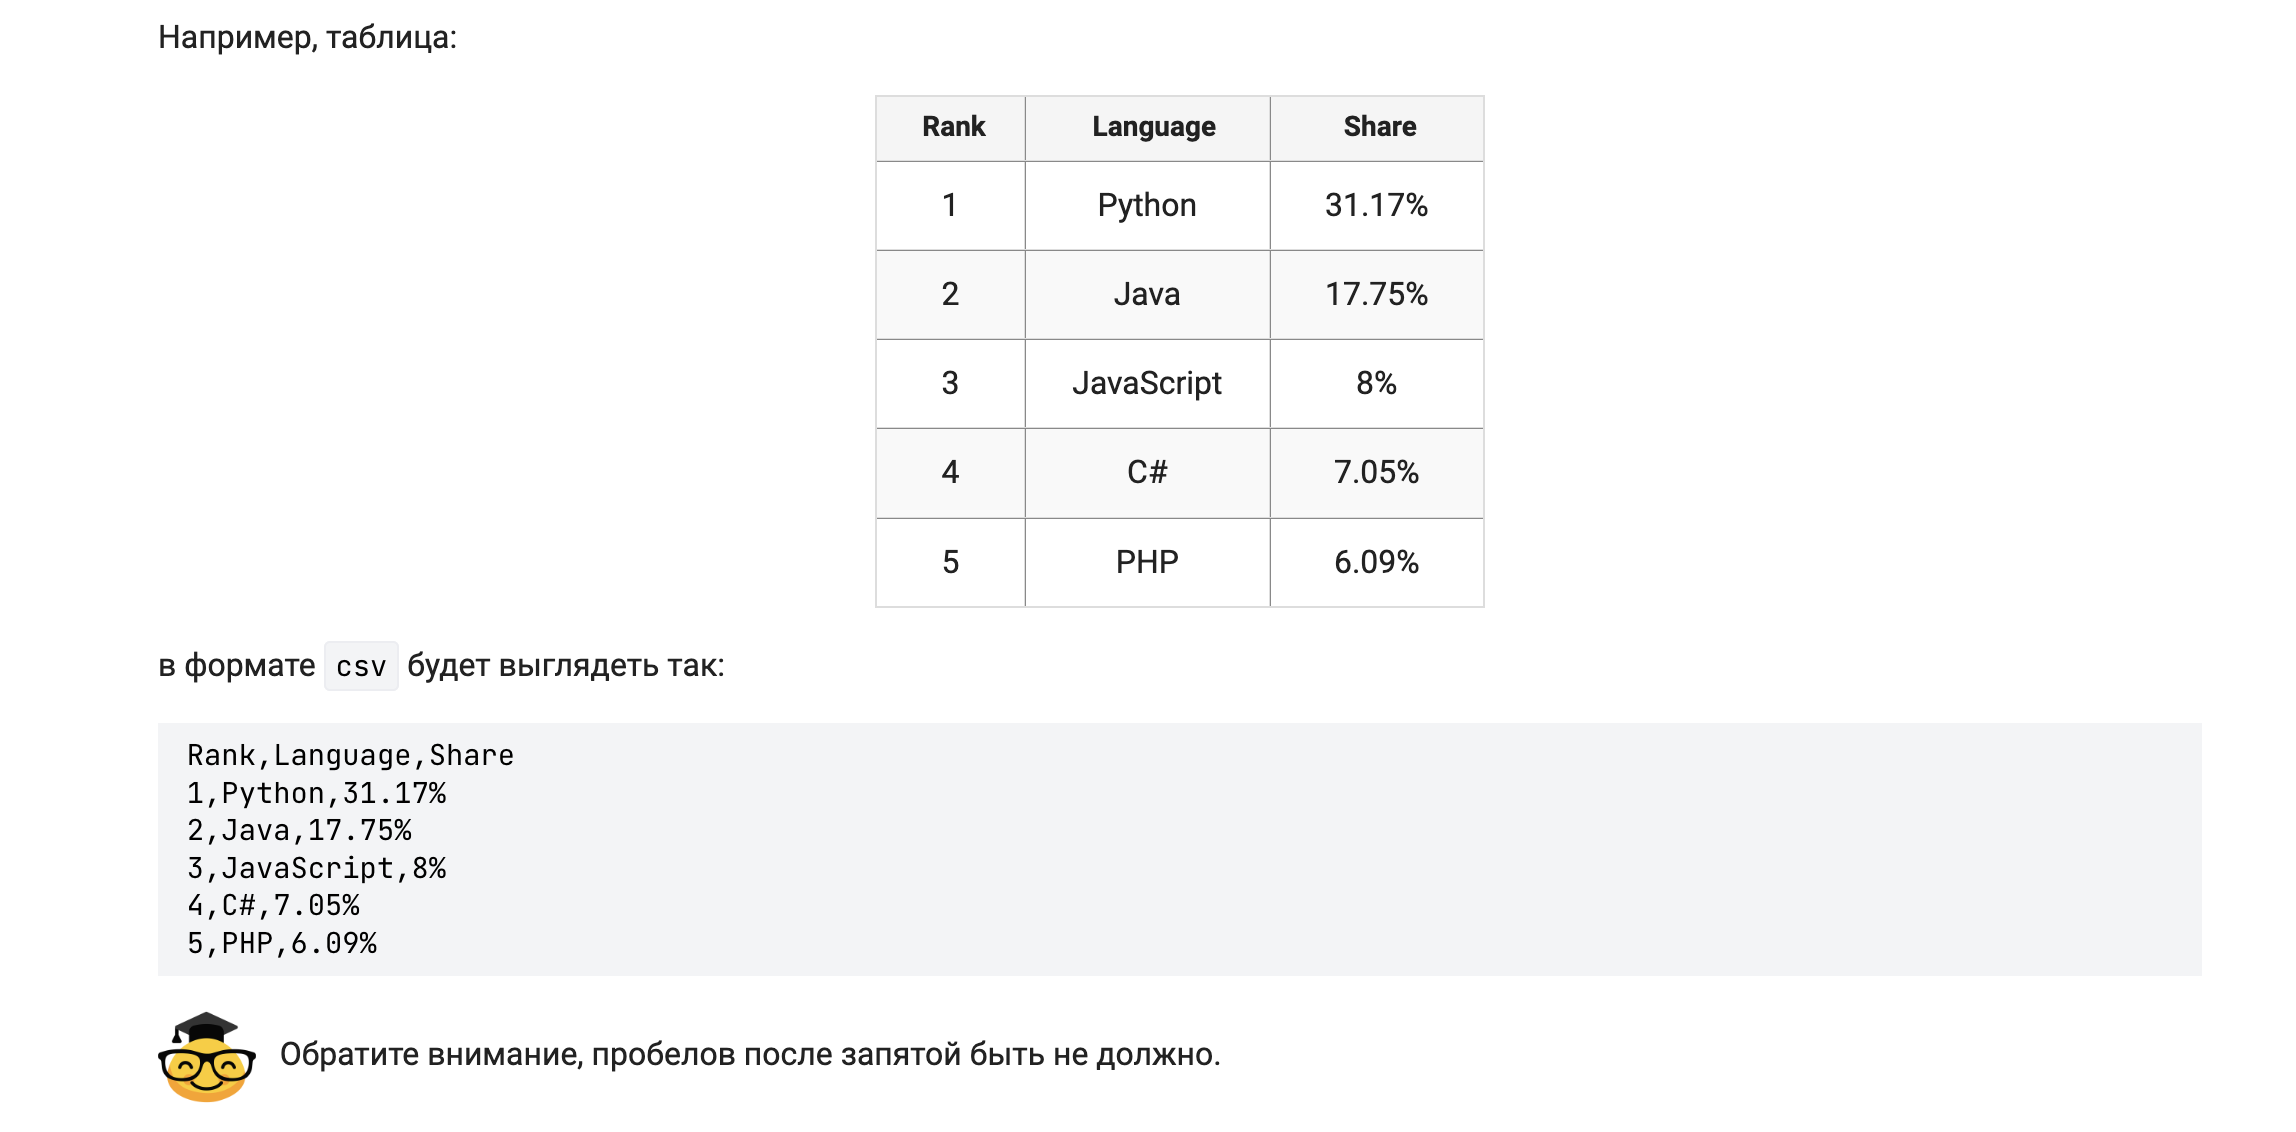

**РАБОТА С CSV ФАЙЛОМ С ПОМОЩЬЮ СТАНДАРТНОГО ФАЙЛОВОГО ВВОДА/ВЫВОДА:**

In [ ]:
#чтение файла
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv') as file:
  rows = [row.strip() for row in file.readlines()] #список строк из файла
  table = [row.split(',') for row in rows] #двумерный массив, где каждый элемент = ячейка таблицы
  print(*table, sep = '\n')

['Rank', 'Language', 'Share']
['1', 'Python', '31.17%']
['2', 'Java', '17.75%']
['3', 'JavaScript', '8%']
['4', 'C#', '7.05%']
['5', 'PHP', '6.09%']


In [ ]:
#запись в файл
text = '''Rank,Language,Share
1,Python,31.17%
2,Java,17.75%
3,JavaScript,8%
4,C#,7.05%
5,PHP,6.09%'''

with open('languages.csv', 'w', encoding='utf-8') as file:
    file.write(text)

**МОДУЛЬ CSV**

Python имеет встроенный модуль **csv** для работы с файлами данного формата.

Он включает в себя:
*   функция csv.reader
*   функция csv.writer
*   класс csv.DictReader
*   класс csv.DictWriter

**csv.reader(file, delimiter, quotechar)** - функция, возвращающая объект чтения =  итератор, с помощью которого можно «пробежаться» циклом по файлу. В каждой итерации цикла будет доступен список элементов строки файла, разбитой по разделителю delimiter

Параметры:
*  **file** - файловая переменная
*  **delimiter** —необязательный параметр,  односимвольная строка, используемая для разделения полей, по умолчанию имеет значение ','
*  **quotechar** — необязательный параметр, односимвольная строка, используемая для кавычек в полях, содержащих специальные символы, по умолчанию имеет значение ' " '.


In [ ]:
import csv
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv') as file:
  rows = csv.reader(file)  #итератор по строкам
  titles = next(rows)  #выделение заголовков
  for row in rows:
    print(row) #вывод строк файла на экран, каждая строка = список

**csv.DictReader(file, delimiter, quotechar)** - объект позволяет считать каждую строку   css файла  в словарь, ключами таких словарей будут являться названия столбов из первой строки файла; объект возвращает итератор по словарям.

С помощью DictReader объекта мы можем обращаться к полям не по индексу, а по названию, что делает код более понятным.

In [ ]:
import csv
rows_list = []
with open('/content/gdrive/MyDrive/Colab Notebooks/languages.csv', encoding='utf-8') as file:
    rows = csv.DictReader(file, delimiter=',')
    for row in rows:
      print(row) #вывод строк файла на экран, каждая строка = словарь
      rows_list.append(row)
    print()

    #Сортировка строк по названию языка программирования в алфавитном порядке
    #в предыдущем цикле все строки сохранялись в список rows_list, потому что rows это итератор, пройдя по нему циклом, он становится пустым
    #или изначально можно было выполнить преобразование rows = list(csv.DictReader(file, delimiter=','))
    for row in sorted(rows_list, key = lambda row: row['Language']):
      print(row)


**writer(file, delimiter)**- функция  возвращает объект записи данных из списков в файловую переменную file с разделителем delimiter.

К объекту записи можно применять методы:
*  **writerrow(row)** - метод запишет в файл строку, состоящую из элементов списка row.
*  **writerrows(data)** - метод запишет в файл сразу все строки, состоящую из элементов двумерного массива data.


In [ ]:
#Запись данных в файл
import csv

columns = ['Имя', 'Фамилия', 'Номер класса', 'Буква класса']
data = [['Тимур', 'Гуев', 11, 'А'], ['Руслан', 'Чаниев', 9, 'Б'], ['Роман', 'Белых', 10, 'В']]

with open('students.csv', 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=';') #объект записи
    writer.writerow(columns) #запись строки с заголовками
    writer.writerows(data) #запись данных

print('Запись в файл завершена')

**csv.DictWriter(file, fieldnames, delimiter)** - функция возвращает объект записи данных из словарей в файловую переменную file с разделителем delimiter.

**file** - файловая переменная \
**fieldnames** -  обязательный параметр, список с названиями столбцов. ключи словарей, которые записываются в файл, должны совпадать с названиям полей, которые переданы в качестве аргумента fieldnames, иначе будет возникать ошибка ValueError.

Применимы методы **writerrow(), writerrows()**

In [ ]:
import csv

data = [{'Имя': 'Тимур', 'Фамилия': 'Гуев', 'Номер класса': 11, 'Буква класса': 'А'},
        {'Имя': 'Руслан', 'Фамилия': 'Чаниев', 'Номер класса': 9, 'Буква класса': 'Б'},
        {'Имя': 'Роман', 'Фамилия': 'Белых', 'Номер класса': 10, 'Буква класса': 'В'}]

columns = ['Имя', 'Фамилия', 'Номер класса', 'Буква класса']

with open('students.csv', 'w', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=columns)
    writer.writeheader()
    for row in data:
        writer.writerow(row)

#РАБОТА С JSON ФАЙЛАМИ

Для передачи данных между различными программами или сохранения состояния программы между запусками бывает необходимо преобразовывать Python-объекты в формат для хранения и наоборот.


**JSON (англ. JavaScript Object Notation)** — текстовый формат обмена данными, основанный на языке программирования JavaScript.

СИНТАКСИЗ JSON ФОРМАТА
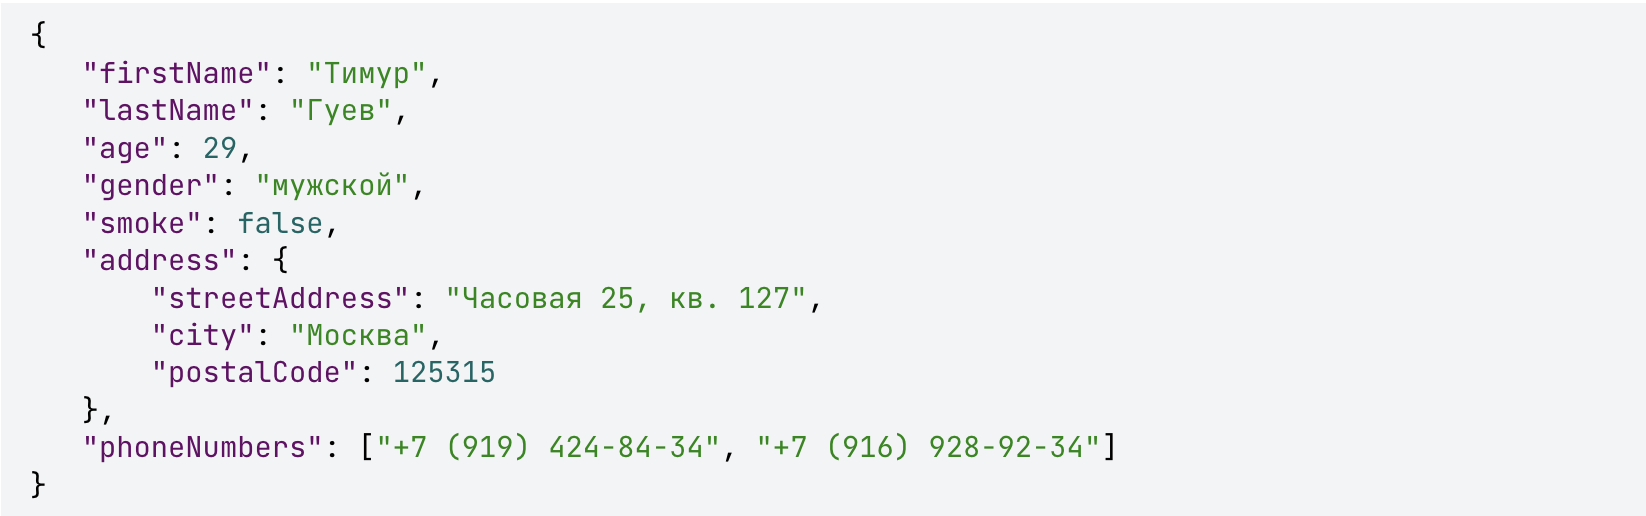

Данные в формате json имеют структуру **ключ-значение**.

Это напоминает словарь Python, но в отличие от словаря, **ключи в json могут быть только строками** , заключенными в двойные кавычки.

Значениями в json формате могут быть:
* **числа** (целое или вещественное)
* **литералы true, false, null** (отсутствие значения)
* **строки** (последовательность символов, заключенная в двойные кавычки)
* **списки** (заключается в квадратные скобки [ ], значения разделяются запятыми). Список может быть пустым, значения в пределах одного списка могут иметь разный тип
* **вложенные словари** (неупорядоченное множество пар ключ: значение, заключённое в фигурные скобки { }). Ключ описывается строкой, между ним и значением стоит символ :. Пары ключ-значение отделяются друг от друга запятыми


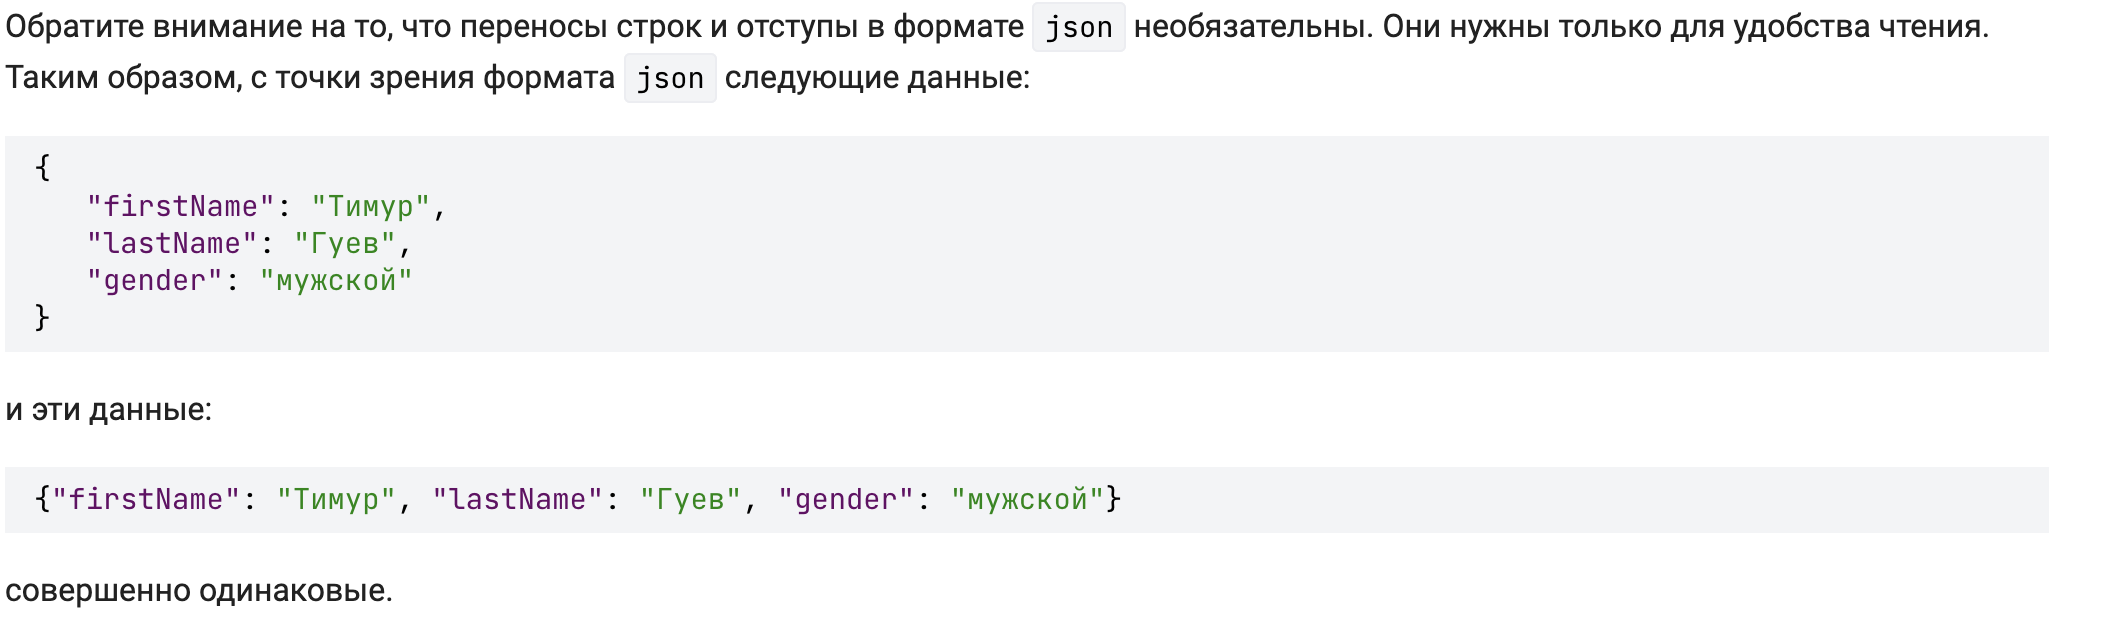

Мы можем сериализовать любой объект, поддерживаемый форматом json, например число, список, строку и т.д.

Поэтому тоже json строка:

 ["Hello", 179, true, null, [1, 2, 3], {"key": "value"}]

https://jsonformatter.curiousconcept.com/ - сайт для удобного представления json

**МОДУЛЬ JSON**

В Python для сериализации и десериализации в формат json есть модуль, который так и называется — json.



**Сериализация**- преобразование переменных программы (Python-объектов) в формат для хранения

**Десериализация**- преобразование формата для хранения в Python-объекты.

**json.dumps(data)** - сериализует данные словаря data в json строку и возвращает ее

**json.dump(data, file)** - записывает словарь data в файл file


dump, dumps имеют необязательные параметры:
*  **indent** - аргумент задает отступ от левого края; по умолчанию none(без отступа).Если значением indent является строка, то она используется в качестве отступа.
*  **sort_keys** - параметр задает сортировку ключей в результирующем json.По умолчанию имеет значение False для более быстрого создания json. Если установить значение аргумента в True, то ключи будут отсортированы в алфавитном порядке
*  **separators**-  задает кортеж, состоящий из двух элементов (item_separator, key_separator), которые представляют разделители для элементов и ключей.  По умолчанию аргумент имеет значение (', ', ': ').

* **skipkey** - если задать значение True, параметр позволит игнорировать неизвестные типы ключей в словаре, который хотим сериализовать


Важный аспект преобразования данных в формат JSON и обратно: данные не всегда будут того же типа, что и исходные данные в Python. Например, кортежи при записи в JSON превращаются в списки. Так происходит из-за того, что в JSON используются другие типы данных и не для всех типов данных Python есть соответствие.

In [ ]:
import json

data = {'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'flag': True}

#преобразование словаря data в json строку
json_data = json.dumps(data)
print(type(json_data))
print(json_data)

#запись словаря data в файл myfile.json
with open('myfile.json', 'w') as file:
  json.dump(data, file)

<class 'str'>
{"name": "Russia", "phone_code": 7, "capital": "Moscow", "flag": true}


In [ ]:
import json

data = {'страна': 'Россия',  'столица': 'Москва', 'flag': True}

#обычная запись кириллицы приведет к экранировнаию каждого символа и строкам вроде "\u0441\u0442\u044"
with open('russian_bad.json', 'w') as file:
  json.dump(data, file)

# если хотим корректно сохранить кириллические данные в JSON-файл
with open('russian_good.json', 'w', encoding="utf-8") as file:
    json.dump(data, file, ensure_ascii=False)

In [ ]:
import json

data = {'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'currency': 'RUB'}

json_data1 = json.dumps(data, indent=3)
json_data2 = json.dumps(data, indent='++++', separators=(';', ' = '))

print(json_data1)
print(json_data2)

**json.loads(json_data)** - десериализует переданную строку(с json содержимым) в словарь или список и возвращает его

**json.load(file)** - десериализует содержимое json файла file в словарь или список и  возвращает его.


In [ ]:
import json

json_data = '{"name": "Russia", "phone_code": 7, "capital": "Moscow", "currency": "RUB"}'
data = json.loads(json_data)
print(type(data))
print(data)

<class 'dict'>
{'name': 'Russia', 'phone_code': 7, 'capital': 'Moscow', 'currency': 'RUB'}


In [ ]:
import json

with open('/content/gdrive/MyDrive/Colab Notebooks/religion.json') as file:
  religions = json.load(file)
  for religion, countries in religions.items():
    print(religion, ': ', end = '')
    print(*countries, sep = ', ')


Islam : Afghanistan, Albania, Algeria, Azerbaijan, Bahrain, Bangladesh, Brunei, Burkina Faso, Chad, Comoros, Djibouti, Egypt, Gambia, Guinea, Guinea-Bissau, Indonesia, Iran, Iraq, Jordan, Kazakhstan, Kosovo, Kuwait, Kyrgyzstan, Lebanon, Libya, Malaysia, Maldives, Mali, Mauritania, Mayotte, Middle East-North Africa, Morocco, Niger, Oman, Pakistan, Palestine, Qatar, Saudi Arabia, Senegal, Sierra Leone, Somalia, Sudan, Syria, Tajikistan, Tunisia, Turkey, Turkmenistan, United Arab Emirates, Uzbekistan, Western Sahara, Yemen
Christianity : American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Bahamas, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Bulgaria, Burundi, Cameroon, Canada, Cape Verde, Caribbean Netherlands, Cayman Islands, Central African Republic, Channel Islands, Chile, Colombia, Congo, Cook Islands, Costa Rica, Cote d'Ivoire, Croatia, Cuba, C

Кодирование символов кирилицы и ensure_ascii


In [ ]:
import json

#При сериализации символов кириллицы может возникнуть ситуация, когда буквы переводятся в их коды
data = {'firstName': 'Тимур', 'lastName': 'Гуев'}
s = json.dumps(data)
print(s)

#Обратное преобразование из строки в словарь вернет закодированное значение в первоначальный вид.
#Благодаря стандартным кодам, символы будут прочитаны и преобразованы в нужный вид любой программой на любом языке программирования.
result = json.loads(s)
print(result)

#С помощью необязательного аргумента ensure_ascii функций dumps() и dump() можно отказаться от такого кодирования.
s = json.dumps(data, ensure_ascii=False)
print(s)
result = json.loads(s)
print(result)



{"firstName": "\u0422\u0438\u043c\u0443\u0440", "lastName": "\u0413\u0443\u0435\u0432"}
{'firstName': 'Тимур', 'lastName': 'Гуев'}
{"firstName": "Тимур", "lastName": "Гуев"}
{'firstName': 'Тимур', 'lastName': 'Гуев'}


Преобразование сложного json объекта к обычному словарю

In [ ]:
import json

# функция для преобразования сложного json объекта к обычному словарю
def flatten_json(start_json_obj, parent_key='', sep='_'):
    res_dict = {}

    def flatten(obj, key_prefix=''):
        if isinstance(obj, dict):
            for k, v in obj.items():
                new_key = f"{key_prefix}{sep}{k}" if key_prefix else k
                flatten(v, new_key)
        elif isinstance(obj, list):
            for i, v in enumerate(obj):
                new_key = f"{key_prefix}{sep}{i}" if key_prefix else str(i)
                flatten(v, new_key)
        else:
            res_dict[key_prefix] = obj

    flatten(start_json_obj)
    return res_dict


# пример json объекта со сложной структурой
complex_json = {
    "user": {
        "id": 12345,
        "name": {
            "first": "Иван",
            "last": "Петров"
        },
        "contacts": {
            "email": "ivan.petrov@example.com",
            "phones": ["+7-900-123-45-67", "+7-901-765-43-21"]
        },
        "addresses": [
            {
                "type": "home",
                "city": "Москва",
                "street": "Тверская",
                "building": 12
            },
            {
                "type": "work",
                "city": "Санкт-Петербург",
                "street": "Невский проспект",
                "building": 25
            }
        ]
    },
    "orders": []
}
print(flatten_json(complex_json))

{'user_id': 12345, 'user_name_first': 'Иван', 'user_name_last': 'Петров', 'user_contacts_email': 'ivan.petrov@example.com', 'user_contacts_phones_0': '+7-900-123-45-67', 'user_contacts_phones_1': '+7-901-765-43-21', 'user_addresses_0_type': 'home', 'user_addresses_0_city': 'Москва', 'user_addresses_0_street': 'Тверская', 'user_addresses_0_building': 12, 'user_addresses_1_type': 'work', 'user_addresses_1_city': 'Санкт-Петербург', 'user_addresses_1_street': 'Невский проспект', 'user_addresses_1_building': 25}


**РАБОТА С JSON СРЕДСТВАМИ PANDAS**

In [ ]:
import json

# объект с json структурой
json_obj = [
            {"name": "Алиса", "age": 25, "city": "Москва"},
            {"name": "Петр", "age": 30, "city": "Санкт-Петербург"},
            {"name": "Кирилл", "age": 28, "city": "Казань"}
            ]
# сериализует данные в json строку
json_string = json.dumps(json_obj)

# путь к файлу
json_file_path = 'info.json'

# запись в json файл
with open(json_file_path, 'w') as json_file:
    json.dump(json_obj, json_file, ensure_ascii=False)



In [ ]:
import pandas as pd
from io import StringIO

# читаем дф из json строки
df1 = pd.read_json(StringIO(json_string))

# читаем дф из json файла
df1 = pd.read_json(json_file_path)

# читаем дф из python объекта с json структурой
df1 = pd.DataFrame(json_obj)

df1

,name,age,city
0,Алиса,25,Москва
1,Петр,30,Санкт-Петербург
2,Кирилл,28,Казань


**Пример с загрузкой данных через API**

Загрузим датасет "Пассажиропоток по станциям Московского метрополитена" с портала открытых данных Москвы через API.

https://data.mos.ru/opendata/62743

Описание API cервиса https://data.mos.ru/developers/useApi


In [ ]:
import requests
import pandas as pd
import json

url = 'https://apidata.mos.ru/v1/datasets/62743/rows'
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

my_params = {"api_key": "62ecb077-7015-4c8c-8c68-115fcabbf8bf"}
response = requests.get(url, headers=headers, params=my_params)
if response.status_code == 200:
    json_data = response.json() # возвращает json объект с ответом сервера
    print(json_data)
else:
    print(f'Произошла ошибка. Код ошибки: {response.status_code}')

# т.к. GET запрос "/v1/datasets/{id}/rows" возвращает список записей, где каждая описывается 3 параметрами(ключами): 'global_id', 'Number', 'Cells'. По ключу 'Cells' представлена основная информация об объекте с помощью словаря атрибутов(=колонок таблицы) и их значений
# изменим вид нашего исходного json объекта на список строк; где каждая строка это словарь атрибутов(=колонок таблицы) и их значений
json_data = [elem['Cells'] for elem in json_data]
print(type(json_data), type(json_data[0]))
print(json_data[0])

df = pd.DataFrame(json_data)
df.head(2)

[{'global_id': 2722110186, 'Number': 1, 'Cells': {'NameOfStation': 'Новаторская', 'Line': 'Троицкая линия', 'Year': 2024, 'Quarter': 'IV квартал', 'IncomingPassengers': 939764, 'OutgoingPassengers': 935750, 'global_id': 2722110186}}, {'global_id': 2722099370, 'Number': 2, 'Cells': {'NameOfStation': 'Университет Дружбы Народов', 'Line': 'Троицкая линия', 'Year': 2024, 'Quarter': 'IV квартал', 'IncomingPassengers': 1003247, 'OutgoingPassengers': 1033877, 'global_id': 2722099370}}, {'global_id': 2722099371, 'Number': 3, 'Cells': {'NameOfStation': 'Генерала Тюленева', 'Line': 'Троицкая линия', 'Year': 2024, 'Quarter': 'IV квартал', 'IncomingPassengers': 456292, 'OutgoingPassengers': 453007, 'global_id': 2722099371}}, {'global_id': 2722099372, 'Number': 4, 'Cells': {'NameOfStation': 'Тютчевская', 'Line': 'Троицкая линия', 'Year': 2024, 'Quarter': 'IV квартал', 'IncomingPassengers': 260913, 'OutgoingPassengers': 249901, 'global_id': 2722099372}}, {'global_id': 2722099378, 'Number': 5, 'Cells

,NameOfStation,Line,Year,Quarter,IncomingPassengers,OutgoingPassengers,global_id
0,Новаторская,Троицкая линия,2024,IV квартал,939764,935750,2722110186
1,Университет Дружбы Народов,Троицкая линия,2024,IV квартал,1003247,1033877,2722099370


**Pandas для работы с json структурами**

**Метод df.explode()**

Метод используется для «разворачивания» элементов списка(или другого итерируемого объекта) внутри одной ячейки таблицы на несколько строк -> Т.е.  если в ячейке был список, каждая элемент списка становится отдельной строкой.

`df.explode(column, ignore_index=False)`

- `column` (str или list[str]) — название столбца (или список столбцов) с последовательностями (списками, кортежами, наборами).  
- `ignore_index` (bool, default=False) — сбрасывать ли индексы после разбиения (True — сбросит индексы, False — сохранит оригинальные)

In [ ]:
import pandas as pd

# Пример DataFrame
df = pd.DataFrame({
    'user': ['Alice', 'Bob'],
    'hobbies': [['reading', 'cycling'], ['painting', 'music']]
})

print(df, '\n')

# Каждое хобби стало отдельной строкой. Пользователь продублирован для каждого своего хобби.
df_exploded = df.explode('hobbies')
print(df_exploded)

    user             hobbies
0  Alice  [reading, cycling]
1    Bob   [painting, music] 

    user   hobbies
0  Alice   reading
0  Alice   cycling
1    Bob  painting
1    Bob     music


**Метод pd.json_normalize()**

Функция "разворачивает" вложенные структуры JSON(например, словари внутри словарей, списки словарей) в плоскую табличку(DataFrame). Можно применить и к конкретному столбцу датафрема, но больше подходит при загрузке самого JSON объекта.

Если словари находятся уже в колонке датафрейма, то больше подойдет .apply(pd.Series)(о нем ниже)

`pd.json_normalize(data, record_path=None, meta=None, meta_prefix=None, record_prefix=None, errors='raise', sep='.', max_level=None)`
- `data` - JSON объект
- `record_path`(str или list[str])- Указывает путь к списку словарей, которые должны стать строками ('key1.key2' или ['key1', 'key2'])
- `meta`(list) - Список полей, которые надо подтянуть вместе со списком
- `max_level`(int) - Максимальное количество уровней (глубина словаря) для нормализации
- `sep`(str) - Разделитель вложенных полей(по умолчанию '.')
- `errors`(str) - 'ignore', если нужно игнорировать ошибки при раскручивании, иначе 'raise'

In [ ]:
# пример 1
json_data = [
    {"name": "Alice", "info": {"city": "New York", "zip": "10001"}},
    {"name": "Bob", "info": {"city": "Los Angeles", "zip": "90001"}}]


pd.json_normalize(json_data)

,name,info.city,info.zip
0,Alice,New York,10001
1,Bob,Los Angeles,90001


In [ ]:
# пример 2
json_data = [
    {
        "name": "Alice",
        "courses": [
            {"course_name": "Math", "grade": 90},
            {"course_name": "Physics", "grade": 85}]
    },
    {
        "name": "Bob",
        "courses": [
            {"course_name": "Math", "grade": 80},
            {"course_name": "Physics", "grade": 88}]
    }
]

df = pd.json_normalize(
    json_data,
    record_path='courses',   # путь к списку
    meta=['name']            # подтянуть имя вместе с курсами
)

# courses развернули в отдельные строки, а name (из внешнего уровня) сохранили в каждой строке
df

,course_name,grade,name
0,Math,90,Alice
1,Physics,85,Alice
2,Math,80,Bob
3,Physics,88,Bob


In [ ]:
# пример 3
# данные поведения пользователя на сайте
data = [
    {
        'Пользователь': {'ID': 'U001', 'Имя': 'Ирина'},
        'Сессия': {
            'Начало': '2025-04-28 09:12:00',
            'Действия': [
                {'Тип': 'поиск', 'Запрос': 'ноутбук для работы'},
                {'Тип': 'просмотр', 'Страница': 'карточка товара', 'ID_товара': 'T1001'},
                {'Тип': 'добавление в корзину', 'ID_товара': 'T1001'}
            ]
        },
        'Устройство': {'Тип': 'мобильный', 'Браузер': 'Chrome'}
    },
    {
        'Пользователь': {'ID': 'U002', 'Имя': 'Алексей'},
        'Сессия': {
            'Начало': '2025-04-28 10:35:00',
            'Действия': [
                {'Тип': 'поиск', 'Запрос': 'наушники с шумоподавлением'},
                {'Тип': 'просмотр', 'Страница': 'список товаров'},
                {'Тип': 'просмотр', 'Страница': 'карточка товара', 'ID_товара': 'T2005'},
                {'Тип': 'покупка', 'ID_товара': 'T2005'}
            ]
        },
        'Устройство': {'Тип': 'десктоп', 'Браузер': 'Firefox'}
    }
]
df1 = pd.json_normalize(data, max_level=0) # Если нужно взять только данные из верхнего уровня
display(df1)

df2 = pd.json_normalize(data, max_level=1, sep='_') # Если хочется разложить json на основе параметров глубже
display(df2)

,Пользователь,Сессия,Устройство
0,"{'ID': 'U001', 'Имя': 'Ирина'}","{'Начало': '2025-04-28 09:12:00', 'Действия': ...","{'Тип': 'мобильный', 'Браузер': 'Chrome'}"
1,"{'ID': 'U002', 'Имя': 'Алексей'}","{'Начало': '2025-04-28 10:35:00', 'Действия': ...","{'Тип': 'десктоп', 'Браузер': 'Firefox'}"


,Пользователь_ID,Пользователь_Имя,Сессия_Начало,Сессия_Действия,Устройство_Тип,Устройство_Браузер
0,U001,Ирина,2025-04-28 09:12:00,"[{'Тип': 'поиск', 'Запрос': 'ноутбук для работ...",мобильный,Chrome
1,U002,Алексей,2025-04-28 10:35:00,"[{'Тип': 'поиск', 'Запрос': 'наушники с шумопо...",десктоп,Firefox


**Метод df['col_name'].apply(pd.Series)**

Подходит, когда уже есть DataFrame, а внутри ячейки — словарь. Метод развернет столбец в новый датафрейм, который можно прилепить к исходному с помощью concat

In [ ]:
# пример
df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'info': [
        {"city": "New York", "zip": "10001"},
        {"city": "Los Angeles", "zip": "90001"}]
})
display(df)

df_info = df['info'].apply(pd.Series)

display(df_info)

df = pd.concat([df, df_info], axis=1).drop(columns=['info'])
display(df)

,name,info
0,Alice,"{'city': 'New York', 'zip': '10001'}"
1,Bob,"{'city': 'Los Angeles', 'zip': '90001'}"


,city,zip
0,New York,10001
1,Los Angeles,90001


,name,city,zip
0,Alice,New York,10001
1,Bob,Los Angeles,90001


# РАБОТА С XML ФАЙЛАМИ

**XML** (eXtensible Markup Language) — это универсальный язык разметки, который позволяет создавать структурированные данные для обмена информацией между различными системами.

Структура из элементов, внутри которых хранится информация с разными типами данных, напоминаеи устройство HTML кода. Начинается с "пролога", записи с указанием версии и кодировки:

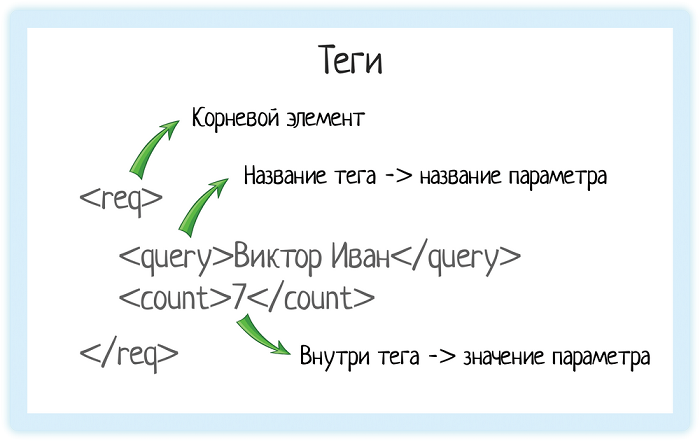

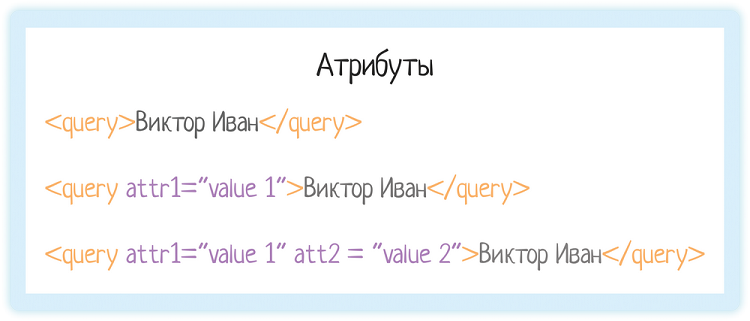

In [ ]:
import xml.etree.ElementTree as ET


country_data_as_string = '''<?xml version="1.0"?>
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E"/>
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
'''

# считывание из строки
root = ET.fromstring(country_data_as_string)
print(type(root))

<class 'xml.etree.ElementTree.Element'>


In [ ]:
# чтение xml из файла
import xml.etree.ElementTree as ET
tree = ET.parse('country_data.xml')
root = tree.getroot()

In [ ]:
# каждый Element имеет: тег и словарь атрибутов
# корневой элемент это тег data, у которого нет атрибутов
print(root.tag)
print(root.attrib)

data
{}


In [ ]:
# корневой тег имеет дочерние узлы, можем посмотреть их теги и атрибуты
for child in root:
    print(type(child))  # тоже тип Element, как и у корневого
    print(child.tag, child.attrib)

<class 'xml.etree.ElementTree.Element'>
country {'name': 'Liechtenstein'}
<class 'xml.etree.ElementTree.Element'>
country {'name': 'Singapore'}
<class 'xml.etree.ElementTree.Element'>
country {'name': 'Panama'}


In [ ]:
# дочерние элементы можно не только перебирать с помощью цикла for, но и доставать по индексу
print(root[1], root[1].text)
print(root[0][1], root[0][1].text)
print()

for child in root[1]:
    print(child.tag, ':', child.text)

<Element 'country' at 0x7909de2a64d0> 
        
<Element 'year' at 0x7909de2a6390> 2008

rank : 4
year : 2011
gdppc : 59900
neighbor : None


Element имеет несколько полезных методов, которые помогают рекурсивно выполнять итерации по всем нижестоящим поддеревьям (их потомкам, их потомкам и т.д.)

**Element.iter('tag_name')**- в элементе, к которому мы обратились  рекурсивно ищет заданный тег по всем нижестоящим поддеревьям (их потомкам, их потомкам и т.д.)

In [ ]:
for neighbor in root.iter('neighbor'):
    print(neighbor.attrib) # словарь атрибутов
    for key in neighbor.attrib: # работаем как с обычным словарем
        print(key, '->', neighbor.attrib.get(key), end='; ')
    print('\n\n')

{'name': 'Austria', 'direction': 'E'}
name -> Austria; direction -> E; 


{'name': 'Switzerland', 'direction': 'W'}
name -> Switzerland; direction -> W; 


{'name': 'Malaysia', 'direction': 'N'}
name -> Malaysia; direction -> N; 


{'name': 'Costa Rica', 'direction': 'W'}
name -> Costa Rica; direction -> W; 


{'name': 'Colombia', 'direction': 'E'}
name -> Colombia; direction -> E; 




**Element.find('tag_name')** - находит первый нижестоящий элемент с определенным тегом и возвращает его (ищет только сряди прямых=своих потомков)

**Element.findall('tag_name')** - возвращает список элементов с заданным тегом, ищет только сряди прямых=своих потомков

In [ ]:
countries = root.findall('country')
print(len(countries))

3


С помощью этой библиотеки можно также строить свои XML строки или перестраивать имеющиеся.

In [ ]:
# Изменение атрибутов и текста элементов
for elem in root.iter('tag_name'):
    elem.set('attribute_name', 'new_value')
    elem.text = 'new_text'

In [ ]:
# Создание новых элементов
new_elem = ET.Element('new_tag')
new_elem.set('attribute_name', 'attribute_value')
new_elem.text = 'element_text'

# добавить его к существующему элементу:
root.append(new_elem)

# РАБОТА С SQL

https://selectel.ru/blog/tutorials/working-with-sql-databases-in-python/

https://metanit.com/python/database/2.1.php

https://eax.me/python-psycopg2/

In [ ]:
import sqlite3
import pandas as pd


sqlite_connection = sqlite3.connect(r'Z:\Крючков А.С\ТФОМС\Базы ОМС\2025\БАЗА ТФОМС ЯНВАРЬ 2025.sqlite')
cursor = sqlite_connection.cursor()
query = f'''SELECT AMB_CODE, COUNT(*)
            FROM "main"
            GROUP BY AMB_CODE
         '''
cursor.execute(query)
rows = cursor.fetchall()
df = pd.DataFrame(data=rows, columns=['AMB_CODE', 'COUNT'])

cursor.close()
sqlite_connection.close()

In [ ]:
import sqlite3
import pandas as pd


conn = sqlite3.connect(database=r'/content/local_db.db')
query = f'SELECT * FROM stations'

df = pd.read_sql(query, conn)
df
conn.close()

In [ ]:
# получить имена таблиц в базе
conn = sqlite3.connect("indicators_db.sqlite3")
query = f"SELECT name from sqlite_master WHERE type='table'"

table_names_df = pd.read_sql(query, conn)
display(table_names_df)
conn.close()

# PANDAS read_csv и read_excel

**Общие фичи для импорта из файла pd.read_csv и pd.read_excel**

In [ ]:
# Чтение только нужных колонок

df = pd.read_csv("data.csv", usecols=["name", "age"])  # Только 2 определенные колонки
df = pd.read_csv("data.csv", usecols=[0, 7])  # или то же самое, но не с названием, а номером колонки

df = pd.read_excel("data.xlsx", usecols="A:D")  # Только столбцы c A по D включительно, т.е == ['A', 'B', 'C', 'D']

In [ ]:
# Указать тип данных при считывании

df = pd.read_csv("data.csv", dtype=str, na_values=[''])  # считать все столбцы как строки, при этом считать пустую строку пропуском
df = pd.read_excel('data.xlsx', dtype={'snils': str, 'polis_oms': str})  # указываем в каком типе данных считать отпределенные столбцы
# иногда это важно, например когла мы считваем информацию о снилсах
# снилс '00001298671' в числовом типе считается как 129867

In [ ]:
# Пропуск пустых строк: избавляет от пустых строк при загрузке

df = pd.read_csv("data.csv", skip_blank_lines=True)
df = pd.read_excel("data.xlsx", skip_blank_lines=True)

In [ ]:
# Задание названий колонок вручную

df = pd.read_excel("data.xlsx", header=None, names=["A", "B", "C"])

# header=None - чтобы первая строка файла не считалась заголовками, тогда названия колонок создадутся автоматически
# names=['col_name1', 'col_name2', ....] -на этапе считывания файла с помощью списка можно указать названия для столбцов

In [ ]:
# Пропуск определённого количества строк с конца или начала файла

df = pd.read_excel("data.xlsx", skiprows=[0, 2, 4])  # при считывании файла строки с переданными номерами будут пропущены

# в целом одно и то же
df = pd.read_csv("data.csv", skiprows=5)  # пропустит первые 5 при считывании файла; т.е. строки с индексами [0, 4] будут пропущены, строка №5 станет заголовками, с 6 строки пойдут данные
df = pd.read_csv("data.csv", header=5)  # передаем номер строки файла(начиная с 0), из которой будут браться заголовки столбцов, все строки выше (0–4) игнорируются, с 6 строки пойдут данные

# skipfooter=8 - пропустить 8 строк в конце файла

# nrows=10 - cчитать только первых 10 строк с начала файла

In [ ]:
# Указываем, какая колонка данных станем индексами дф(в параметр index_col передаем ее название или номер)

df = pd.read_csv("data.csv", index_col='col_nameX')
df = pd.read_excel("data.xlsx", index_col=2)

In [ ]:
# Указать, какой символ в файле следует распознавать как десятичную точку для преобразования строковых столбцов в числовые.(по умолчанию задана '.')

df = pd.read_csv("data.csv", dicimal=',')

In [ ]:
# Указываем кодировку считываемого файла, по умолчанию 'utf-8'

df = pd.read_csv("data.csv", encoding='windows-1251')
df = pd.read_excel("data.xlsx", encoding='ASCII')

In [ ]:
# Задачать набор пустых значений

# по умолчанию строки из набора считаются пустым значением  ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘None’, ‘n/a’, ‘nan’, ‘null’.
# если нужно добавить еще что-то от себя, используем параметр na_values
df = pd.read_csv("data.csv", na_values=[-1])  # чтобы -1 тоже считалось пропуском
df = pd.read_excel("data.xlsx", na_values={'col_name1': [0, -1]})  # чтобы 0 и -1 тоже считались пропуском, но только для колонки 'col_name1'

**Фичи только для pd.read_csv()**

In [ ]:
# Если в CSV используется не запятая, а нестандартный разделитель

df = pd.read_csv("data.csv", delimiter=";")
df = pd.read_csv("data.csv", sep="|")

In [ ]:
# Пропуск строк с ошибками

# Если встречаются строки, которые нельзя прочитать, можно их игнорировать
df = pd.read_csv("data.csv", on_bad_lines="skip")

In [ ]:
# Убирает лишние пробелы в данных, объединяя несколько пробелов в один

df = pd.read_csv("data.csv", skipinitialspace=True)

In [ ]:
# Как считать csv файл, где данные обрамлены с помощью какого-то символа
# Это означает, что все значения в CSV файле, которые заключены в кавычки ("), будут рассматриваться как одно поле, даже если внутри этих значений есть разделители

df = pd.read_csv(file, sep=';', quotechar='"')

Считывание большого файла кусочками

При считывании массивного датасета можно исчерпать оперативную память и упасть с ошибкой out of memory. Поэтому для эффективного использования оперативной памяти при считывании больших файлов в pandas используется параметр **chunksize**. Данный параметр позволяет обрабатывать данные по частям, избегая загрузки всего содержимого файла в память сразу.

Статья, где описывается пример использования https://habr.com/ru/articles/488594/

In [ ]:
reader = pd.read_csv('мед орг.csv', chunksize=5) # 5 строк - размер чанка/фрагмента

print(type(reader)) # При использовании этой опции создается специальный объект-итератор

# с помощью итератора можно просматривать каждый фрагмент файла отдельно
for df in reader:
    # df - датафрейм с кусочком файла
    print(list(df.index))  # будем выводить индексы маленьких дф
    input('---') # input здесь для наглядности

**Фичи только для pd.read_excel()**

In [ ]:
# Если в файле несколько листов (sheets), можно загрузить только нужный, указывая в параметре sheet_name название или индекс листа

df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
df = pd.read_excel("data.xlsx", sheet_name=0)

In [ ]:
# Можно прочитать весь Excel-файл как словарь {лист: DataFrame}

sheets = pd.read_excel("data.xlsx", sheet_name=None)  # Читаем все листы
df1 = sheets["Sheet1"]
df2 = sheets["Sheet2"]

In [ ]:
# Пропуск объединенных ячеек
df = pd.read_excel("data.xlsx", merge_cells=False)

# PANDAS ЗАПИСЬ В ФАЙЛ

In [ ]:
import csv  # Импортируем модуль csv

df.to_csv('path/file_name.csv',
          sep=';',  # разделитель
          na_rep='NaN',  # как будут записаны пропуски
          columns=['name1', 'name3', 'name4'],  # названия колонок, которые нужно сохранить в файл
          index=False,  # чтобы индексы не сохранялись в файл
          header=False,  # чтобы названия колонок не сохранялись в файл
          encoding='windows-1251'  # указываем кодировку, в которой хотим сохранить файл; по умолчанию это utf-8
          quoting=csv.QUOTE_ALL,  # параметр указывает, какие ячейки обрамлять в кавычки; по умолчанию csv.QUOTE_MINIMAL это значит, что в кавычки обамляются только ячейки с float числами
          # csv.QUOTE_ALL означает, что обрамлять в кавычки нужно все поля; остальное тут https://docs-python.ru/standart-library/modul-csv-python/konstanty-modulja-csv/
          quotechar='"',  # какой символ будет убрамлять данные

)

In [ ]:
df.to_sql(...)

In [ ]:
df.to_json(path_or_buf=None, # путь к файлу, куда сохранится json(если None, то метод возвращает json строку)
           orient='columns', # формат представление json; допустимые значения: 'split', 'records', 'index', 'columns', 'values', 'table';
           lines=False, # если True, сериализует в JSON Lines (каждая строка — отдельный JSON-объект).
           index=True, # сохранять индексы или нет
           indent=None, # добавляет отступы для читабельности; принимает int число - кол-во пробелов, используемых для отступа каждой записи.
           )

'split' : словарь типа {'index': [index], 'columns': [columns], 'data': [values]}

'records': список словарей, каждый словарь=строка [{column: value}, … , {column: value}]

'index' : словарь типа {index: {column: value}}

'columns' : словарь типа {column: {index: value}}

'values' : только массив значений

'table' : словарь типа {'schema': {schema}, 'data': {data}}

In [ ]:
#Пример записи в excel файл с заголовком перед дф

df = pd.DataFrame({'team': ['A', 'B', 'B', 'B', 'B', 'M', 'M', 'M'],
                   'player': ['Мюллер', 'Кейн', 'Бэкхем', 'Бэнкс', 'Кейн', 'Бонуччи', 'Бонуччи', 'Росси'],
                   'goals': [1, 1, 2, 0, 1, 2, 1, 1],
                   'cards': [1, 0, 1, 0, 1, 1, 2, 0],
                   'passes': [20, 30, 10, 25, 22, 17, 34, 22]
                   })
with pd.ExcelWriter("test.xlsx") as writer:
    df.to_excel(writer, sheet_name="Страница А", startrow=1, index=False)
    worksheet = writer.sheets["Страница А"]
    worksheet.write_string(0, 0, 'Данные о матчах')